<a href="https://colab.research.google.com/github/annaklaracss/pca_tratamento-de-dados/blob/main/PCA_ExemploMatlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1G6GrSEkHTAZ_oBOx1Cuc2bjNbpGmEmi9"
df = pd.read_csv(url, delimiter=';')
df.columns = df.columns.str.strip()

In [ ]:
#Conferindo se o programa leu certo
print(df.head())

   climate  housing  health  crime  transportation  education  arts  \
0      521     6200     237    923            4031       2757   996   
1      575     8138    1656    886            4883       2438  5564   
2      468     7339     618    970            2531       2560   237   
3      476     7908    1431    610            6883       3399  4655   
4      659     8393    1853   1483            6558       3026  4496   

   recreation  economics                                       names  
0        1405       7633  Abilene TX                                  
1        2632       4350  Akron OH                                    
2         859       5250  Albany GA                                   
3        1617       5864  Albany-Troy NY                              
4        2612       5727  Albuquerque NM                              


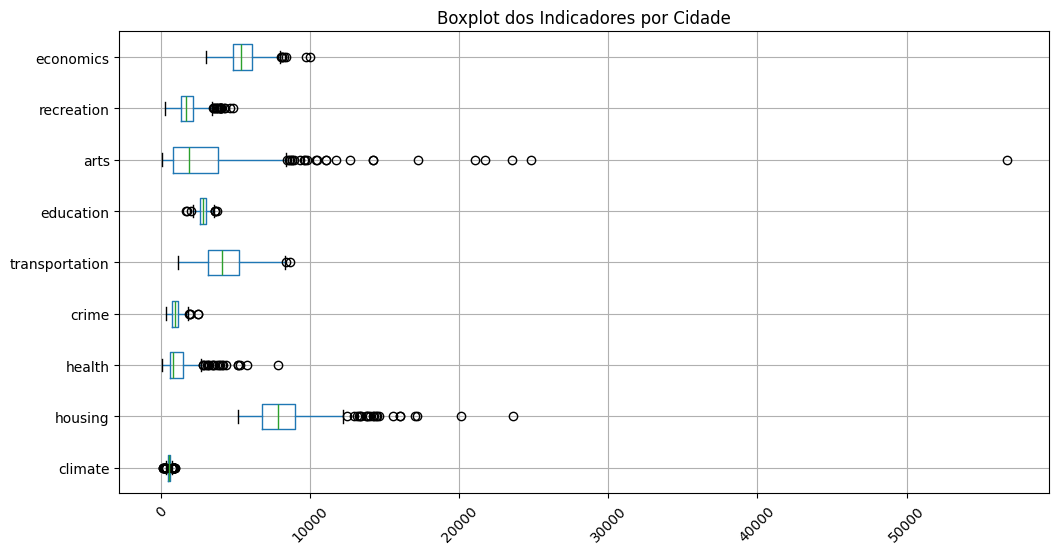

In [ ]:
#Boxplot
plt.figure(figsize=(12,6))
df.drop(columns=["names"]).boxplot(vert=False)
plt.title("Boxplot dos Indicadores por Cidade")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Padronização dos dados
X = df.drop(columns=["names"])
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [ ]:
#PCA pra 2 componentes:
#Visualização - se você reduz para 2 componentes, consegue fazer um gráfico de dispersão em 2D e enxergar os dados no plano.
#Exploração inicial - geralmente começa-se com 2 componentes para ter uma noção de como os dados se distribuem e se há padrões/grupos.
#Variedade dos dados → muitas vezes os 2 primeiros componentes já explicam uma fração considerável da variância (digamos, 60–80%).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Scaled)

In [ ]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cidade"] = df["names"]

print("Variância explicada por cada componente:", pca.explained_variance_ratio_)

Variância explicada por cada componente: [0.37869909 0.13488624]


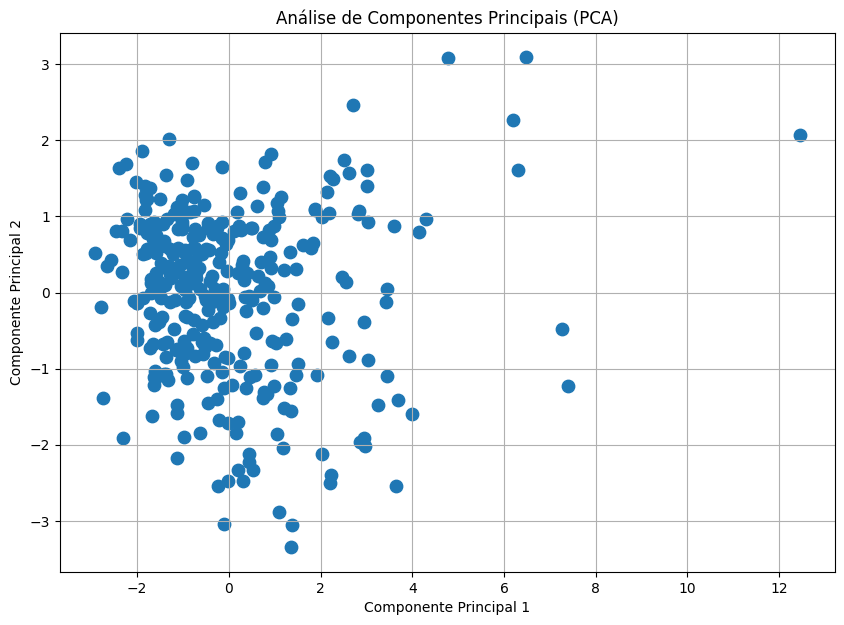

In [ ]:
#Plota gráfico para 2 componentes principais
plt.figure(figsize=(10,7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], marker='o', s=80)
plt.title("Análise de Componentes Principais (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()

In [ ]:
#PCA para os componentes que representam 95% de importância
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_Scaled)
loadings = pca.components_.T

In [ ]:
var_exp = pca.explained_variance_ratio_ * 100
var_exp_acum = np.cumsum(var_exp)

print("Variância explicada por cada componente:", var_exp)
print("Variância explicada acumulada:", var_exp_acum)

Variância explicada por cada componente: [37.8699089  13.48862407 12.68310164 10.23242026  8.36983198  7.0062433
  5.478308  ]
Variância explicada acumulada: [37.8699089  51.35853297 64.0416346  74.27405486 82.64388684 89.65013014
 95.12843815]


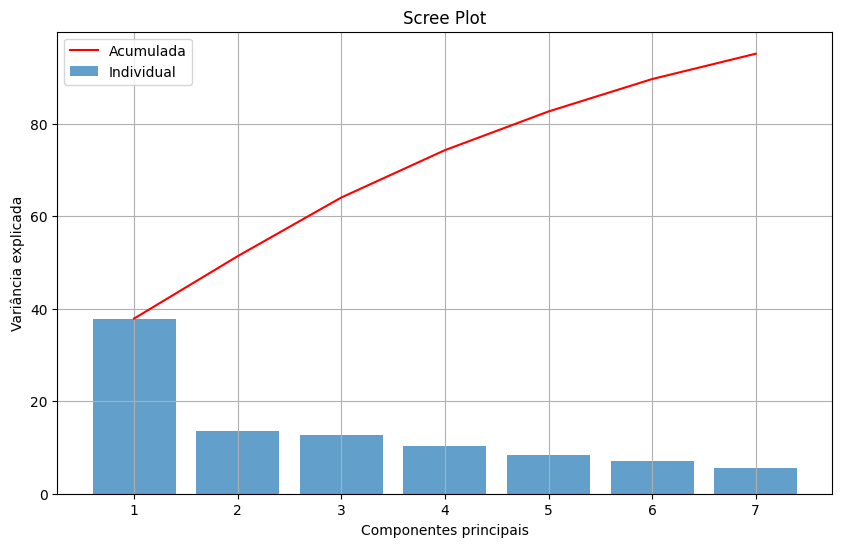

In [ ]:
#Scree plot dos componentes principais selecionados
plt.figure(figsize=(10,6))
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.7, align="center", label="Individual")
plt.plot(range(1, len(var_exp)+1), var_exp_acum, color='red', label="Acumulada")
plt.xlabel("Componentes principais")
plt.ylabel("Variância explicada")
plt.title("Scree Plot")
plt.xticks(range(1, len(var_exp)+1))
plt.legend()
plt.grid()
plt.show()

In [ ]:
lambdas = pca.explained_variance_
T2 = np.sum((X_pca**2) / lambdas, axis=1)
cities = df["names"]
results = pd.DataFrame({"Cidade": cities,"T2": T2})
results_sorted = results.sort_values(by="T2", ascending=False)
print(results_sorted.head(10))

                                         Cidade          T2
212  New York NY                                 116.107995
289  Stamford CT                                  32.913455
178   Los Angeles Long Beach CA                   31.331662
64   Chicago IL                                   25.829826
216  Norwalk CT                                   23.413860
269  San Francisco CA                             23.154354
206  Nassua-Suffolk NY                            21.400815
194  Midland TX                                   21.350596
313  Washington DC-MD-VA                          21.050413
191  Miami-Hialeah FL                             20.379103


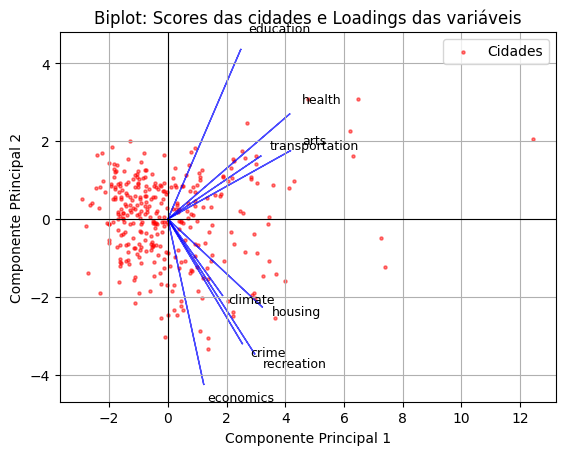

In [ ]:
#o MATLAB biplot não plota os scores crus (como fazemos em Python), mas sim uma versão escalonada para caber no mesmo sistema de eixos dos loadings.
plt.scatter(X_pca[:,0], X_pca[:,1], s=5,color='red',alpha=0.5, label="Cidades")

plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)

scaling_factor = np.max(np.abs(X_pca)) / np.max(np.abs(loadings))
scores_scaled = X_pca / np.max(np.abs(X_pca))
loadings_scaled = loadings * scaling_factor * 0.5

for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings_scaled[i,0], loadings_scaled[i,1], color='blue', alpha=0.7, head_width=0.01, linewidth=1)
    plt.text(loadings_scaled[i,0]*1.1, loadings_scaled[i,1]*1.1, var, color='black', fontsize=9)

plt.xlabel(f"Componente Principal 1")
plt.ylabel(f"Componente PRincipal 2")
plt.title("Biplot: Scores das cidades e Loadings das variáveis")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#PCA Em 3D
pca = PCA(n_components=3)
scores = pca.fit_transform(X_Scaled)
loadings = pca.components_.T

explained = pca.explained_variance_ratio_ * 100

In [ ]:
scores_scaled = scores / np.max(np.abs(scores))
loadings_scaled = loadings / np.max(np.abs(loadings)) * 0.5

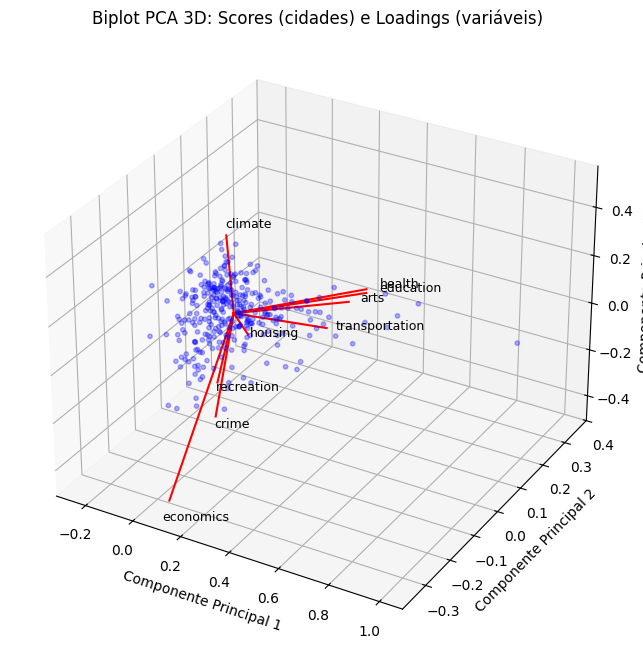

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scores_scaled[:,0], scores_scaled[:,1], scores_scaled[:,2], color="blue", alpha=0.3, s=10)

for i, var in enumerate(X.columns):
    ax.plot([0, loadings_scaled[i,0]], [0, loadings_scaled[i,1]], [0, loadings_scaled[i,2]], color='red', linewidth=1.5)
    ax.text(loadings_scaled[i,0]*1.1, loadings_scaled[i,1]*1.1, loadings_scaled[i,2]*1.1, str(var), color='black', fontsize=9)

ax.set_xlabel(f"Componente Principal 1")
ax.set_ylabel(f"Componente Principal 2")
ax.set_zlabel(f"Componente Principal 3")
ax.set_title("Biplot PCA 3D: Scores (cidades) e Loadings (variáveis)")

plt.show()